In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
# Задаем параметры
batch_size = 64

In [3]:
# Применение преобразований к данным
transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
    ]
)

In [4]:
# Загрузка тренировочного и тестового данных
train_dataset = datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

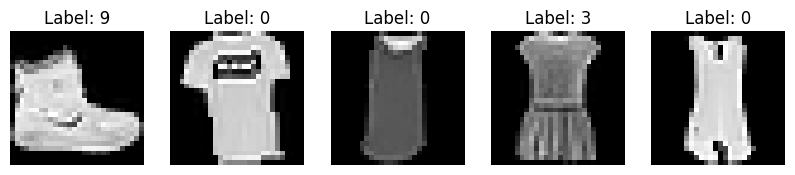

In [5]:
# Загрузка нескольких изображений и их меток
num_samples = 5  # Количество изображений для отображения
images = []
labels = []

for i in range(num_samples):
    img, label = train_dataset[i]  # Получите i-ый элемент из датасета
    images.append(img)  # Добавьте изображение в список
    labels.append(label)  # Добавьте метку в список

# Визуализация изображений
plt.figure(figsize=(10, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')  # Изображение может быть в формате (1, 28, 28)
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')  # Уберите оси
plt.show()

In [6]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Первый полносвязный слой
        self.fc2 = nn.Linear(128, 64)  # Второй полносвязный слой
        self.fc3 = nn.Linear(64, 10)  # Выходной слой для 10 классов
        self.relu = nn.ReLU()  # Активация ReLU
        self.dropout = nn.Dropout(0.2)  # Регуляризация Dropout

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Преобразуем из 2D в 1D
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [7]:
# Создаем экзмепляр модели
model = SimpleNN()
criterion = nn.CrossEntropyLoss()  # Функция потерь
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Оптимизатор Adam


def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        for images, labels in train_loader:
            optimizer.zero_grad()  # Обнуляем градиенты
            output = model(images)  # Прямой проход
            loss = criterion(output, labels)  # Вычисление потерь
            loss.backward()  # Обратный проход
            optimizer.step()  # Обновление параметров

        print(f"Epoch {epoch + 1}, Loss: {loss.item():.4f}")

In [8]:
# Обучаем модель
train(model, train_loader, criterion, optimizer, epochs=10)

Epoch 1, Loss: 0.3761
Epoch 2, Loss: 0.3659
Epoch 3, Loss: 0.2755
Epoch 4, Loss: 0.4671
Epoch 5, Loss: 0.4938
Epoch 6, Loss: 0.3375
Epoch 7, Loss: 0.6689
Epoch 8, Loss: 0.3340
Epoch 9, Loss: 0.2336
Epoch 10, Loss: 0.5573


In [9]:
def test(model, test_loader):
    model.eval()  # Переключаем модель в режим оценки
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Точность на тестовой выборке: {accuracy:.2f}%")

In [10]:
# Проверяем качество
test(model, test_loader)

Точность на тестовой выборке: 85.99%
